In [6]:
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import Shock1D
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# set up numerical solution
N = 64
p = 3

solver = EulerSolver(
    w0=Shock1D(),
    w0_passives={
        "tracer1": lambda x, y, z: np.sin(2 * np.pi * x),
        "tracer2": lambda x, y, z: np.where(
            np.logical_and(x > 0.25, x < 0.75), 1.0, 0.0
        ),
    },
    bc=BoundaryCondition(x="free"),
    gamma=1.4,
    nx=N,
    px=p,
    riemann_solver="hllc",
    a_posteriori_slope_limiting=p > 0,
    NAD=1e-5,
)

In [8]:
# run simulation
solver.run(0.245)

100%|██████████| 0.245/0.245 [00:01]               


Text(0.5, 0, '$x$')

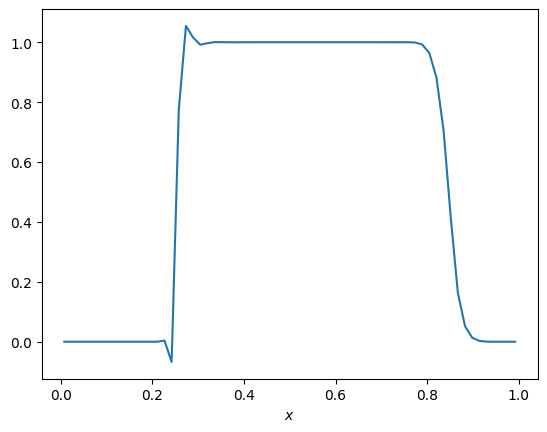

In [11]:
fig, ax = plt.subplots()
solver.plot_1d_slice(ax, param="tracer2", y=0.5, z=0.5)
ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$\rho$")